In [1]:
# importing
import plotly
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import chart_studio

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
import chart_studio.plotly as py
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns
import plotly.express as px

import plotly.graph_objs as go
from pmdarima import auto_arima

chart_studio.tools.set_credentials_file(username='shhreyaa',                                              
                                  api_key='UGJfLKcZ6nznR80PcPL8')

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:

df = pd.read_excel("sales_11.xlsx")


df.info()
df1= df
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order Date    9994 non-null   datetime64[ns]
 2   Customer ID   9994 non-null   object        
 3   Segment       9994 non-null   object        
 4   Product ID    9994 non-null   object        
 5   Category      9994 non-null   object        
 6   Sub-Category  9994 non-null   object        
 7   Product Name  9994 non-null   object        
 8   Sales         9994 non-null   float64       
 9   Quantity      9994 non-null   int64         
 10  Discount      9994 non-null   float64       
 11  Profit        9994 non-null   float64       
 12  month         9994 non-null   object        
 13  year          9994 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 1.1+ MB


,Row ID,Order Date,Customer ID,Segment,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,month,year
0,1,2016-11-08,CG-12520,Consumer,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,31435.20,2,0.00,5029.632,Nov,2016
1,2,2016-11-08,CG-12520,Consumer,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",87832.80,3,0.00,26349.840,Nov,2016
2,3,2016-06-12,DV-13045,Corporate,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,1754.40,2,0.00,824.568,Jun,2016
3,4,2015-10-11,SO-20335,Consumer,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,114909.30,5,0.45,-45963.720,Oct,2015
4,5,2015-10-11,SO-20335,Consumer,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,2684.16,2,0.20,301.968,Oct,2015
5,6,2014-06-09,BH-11710,Consumer,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,5863.20,7,0.00,1700.328,Jun,2014
6,7,2014-06-09,BH-11710,Consumer,OFF-AR-10002833,Office Supplies,Art,Newell 322,873.60,4,0.00,235.872,Jun,2014
7,8,2014-06-09,BH-11710,Consumer,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,108858.24,6,0.20,10885.824,Jun,2014
8,9,2014-06-09,BH-11710,Consumer,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,2220.48,3,0.20,693.900,Jun,2014
9,10,2014-06-09,BH-11710,Consumer,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,13788.00,5,0.00,4136.400,Jun,2014


In [3]:

# sale_category = df
# sale_category.head()

# cols = ['Row ID', 'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
# sale_category.drop(cols, axis=1, inplace=True)
# sale_category = sale_category.sort_values('Order Date')
# sale_category.isnull().sum()
# sale_category= sale_category.groupby('Order Date')['Sales'].sum().reset_index()
# sale_category = sale_category.set_index('Order Date')
# sale_category=sale_category['Sales'].resample('MS').sum()

# y_fact=sale_category



# sale_category = df
# sale_category.head()
# cols = ['Row ID', 'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
# sale_category.drop(cols, axis=1, inplace=True)
# sale_category = sale_category.sort_values('Order Date')

# sale_category.isnull().sum()
# sale_category= sale_category.groupby('Order Date')['Sales'].sum().reset_index()
# sale_category = sale_category.set_index('Order Date')
# sale_category=sale_category['Sales'].resample('MS').sum()

# trace_cat = go.Scatter(
#         y = y_fact,
#         x= y_fact.index,
#         mode='lines',
          
#         line = dict(
# #                    color = colors[y],
#                 width = 2,
# #                 dash = 'dot'
#                 )
#         )
     

    
# layout = go.Layout(
#     xaxis=dict(title='Year from 2014 to 2018', zeroline=False, rangeslider=dict(visible=True)),
#     yaxis=dict(title='Sales', zeroline=False),

#     title='Sales vs Profit',
#     showlegend=True,
#     )
# fig = go.Figure(data=trace_cat, layout=layout)
# py.iplot(fig,sharing='public')
# # x= sale_category
# # y = sale_category['Sales'].resample('MS').sum()
# print(sale_category.head())
# print(y_fact)


In [4]:
# from pylab import rcParams
# # Arima_factors = [trend,seasonal,resid,
# # observed]
# # rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(y_fact, model='additive')

# trace_cat = go.Scatter(
#         y = decomposition.resid,
#         x= y_fact.index,
#         mode='lines',
          
#         line = dict(
# #                    color = colors[y],
#                 width = 2,
# #                 dash = 'dot'
#                 )
#         )
# layout = go.Layout(
#     xaxis=dict(title='Year from 2014 to 2018', zeroline=False, rangeslider=dict(visible=True)),
#     yaxis=dict(title='Sales', zeroline=False),

#     title='Sales vs Profit',
#     showlegend=True,
#     )
# fig = go.Figure(data=trace_cat, layout=layout)
# py.iplot(fig,sharing='public')

In [5]:
# from pylab import rcParams
# Arima_factors = ['trend','seasonal','resid','observed']
# rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(y_fact, model='additive')

# for i in range(3):
#     fact=Arima_factors[i]
#     print(fact)
#     print(decomposition.fact)
# #     trace_cat = go.Scatter(
# #         y = decomposition.fact,
# #         x= sale_category.index,
# #         mode='lines',
          
# #         line = dict(
# # #                    color = colors[y],
# #                 width = 2,
# # #                 dash = 'dot'
# #                 )
# #         )
# #     layout = go.Layout(
# #       xaxis=dict(title='Year from 2014 to 2018', zeroline=False, rangeslider=dict(visible=True)),
# #       yaxis=dict(title='Sales', zeroline=False),

# #       title='Sales vs Profit',
# #       showlegend=True,
# #     )
# #     fig = go.Figure(data=trace_cat, layout=layout)
# #     py.iplot(fig,sharing='public')

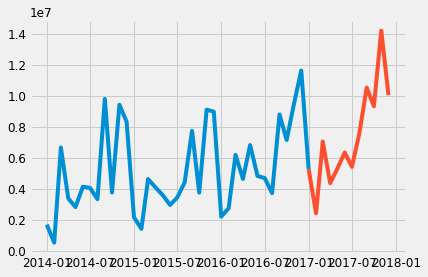

In [6]:

sale_category = df
sale_category.head()
cols = ['Row ID', 'Customer ID', 'Segment', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
sale_category.drop(cols, axis=1, inplace=True)
sale_category = sale_category.sort_values('Order Date')

sale_category.isnull().sum()
sale_category= sale_category.groupby('Order Date')['Sales'].sum().reset_index()
sale_category = sale_category.set_index('Order Date')
sale_category=sale_category['Sales'].resample('MS').sum()

sale_category.head(100)
train = sale_category[:'2017-01-01']
train.head()
test= sale_category['2017-01-01':]
plt.plot(train)
plt.plot(test)

In [7]:
stepwise_model = auto_arima(sale_category, start_p=0,start_q=0,
                           max_p=2,max_d=2, max_q=2, m=12,
                           start_P=0,start_Q=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1134.543, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1131.309, Time=0.07 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1128.995, Time=0.05 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1142.802, Time=0.01 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=1136.686, Time=0.02 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=1130.770, Time=0.13 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=1129.775, Time=0.10 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=1130.248, Time=0.04 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=1130.943, Time=0.20 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=1128.145, Time=0.03 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=1129.503, Time=0.08 sec
 ARIMA(0,0,0)(0,1,2)[12] intercept   : AIC=1128.476, Time=0.07 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1129.334, Time=0.05 sec
 ARIMA(0,0,0)(1,1,2)[12] intercept   : AIC=1128.824, Time=0.44 sec
 ARIMA(1,0,0)(0,1,1

In [8]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -558.673
Date:                            Wed, 10 Feb 2021   AIC                           1127.347
Time:                                    23:45:43   BIC                           1135.264
Sample:                                         0   HQIC                          1130.110
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.753e+05   8.69e+05      0.662      0.508   -1.13e+06    2.28e+06
ar.L1          0.5558      0.660      0.842      0.400      -0.738       1.850
ma.L1         -0.6541      0.577     -1.134      0.257      -1.785       0.476
ma.S.L12      -0.3769      0.169     -2.225      0.026      -0.709      -0.045
sigma2      2.304e+12      0.236   9.76e+12      0.000     2.3e+12     2.3e+12
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 1.59
Prob(Q):                              0.60   Prob(JB):                         0.45
Heteroskedasticity (H):               3.62   Skew:                             0.50
Prob(H) (two-sided):                  0.03   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.98e+38. Standard errors may be unstable.
"""

In [9]:
stepwise_model.fit(train)

ARIMA(order=(1, 0, 1), scoring_args={}, seasonal_order=(0, 1, 1, 12),
      suppress_warnings=True)

In [10]:
future_forecast = stepwise_model.predict(n_periods=12)
# This returns an array of predictions:
print(future_forecast)

[ 4013274.45936519  7567280.45037782  6203828.61075658  7466883.80233688
  6179657.32089716  6214278.3937429   5763481.20104856 10349136.56723359
  7845754.1525185  11102167.03500859 12327025.2590171   6217726.6069353 ]


In [11]:
future_forecast = stepwise_model.predict(n_periods=12)
# This returns an array of predictions:
print(future_forecast)

[ 4013274.45936519  7567280.45037782  6203828.61075658  7466883.80233688
  6179657.32089716  6214278.3937429   5763481.20104856 10349136.56723359
  7845754.1525185  11102167.03500859 12327025.2590171   6217726.6069353 ]


In [12]:
len(test.index)
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns =
                               ["Prediction"])
pd.concat([test,future_forecast],axis=1).iplot()

In [13]:
pd.concat([sale_category,future_forecast],axis=1).iplot()

In [27]:
future_forecast2 = stepwise_model.predict(n_periods=30)
# This returns an array of predictions:
print(future_forecast2)
index = pd.date_range('2017-12-01', periods=30, freq='M')
future_forecast2 = pd.DataFrame(future_forecast2,index =index,columns =
                               ["Prediction"])
pd.concat([sale_category,future_forecast2],axis=1).iplot()
print(sale_category)



[ 4013274.45936519  7567280.45037782  6203828.61075658  7466883.80233688
  6179657.32089716  6214278.3937429   5763481.20104856 10349136.56723359
  7845754.1525185  11102167.03500859 12327025.2590171   6217726.6069353
  5436524.99261671  8966841.75094139  7587595.15498313  8840119.21915077
  7545871.12609415  7575810.55111942  7121891.87755848 11705466.00158814
  9200695.92214134 12456183.58148876 13680424.91451189  7570714.95139571
  6789239.09613178 10319373.0047641   8940004.49407879 10192447.27180575
  8898144.98115054  8928048.27001746]


Order Date
2014-01-01    1.708427e+06
2014-02-01    5.423870e+05
2014-03-01    6.682921e+06
2014-04-01    3.395441e+06
2014-05-01    2.837794e+06
2014-06-01    4.151415e+06
2014-07-01    4.073567e+06
2014-08-01    3.349136e+06
2014-09-01    9.813282e+06
2014-10-01    3.774407e+06
2014-11-01    9.435446e+06
2014-12-01    8.345474e+06
2015-01-01    2.180889e+06
2015-02-01    1.434169e+06
2015-03-01    4.647150e+06
2015-04-01    4.103425e+06
2015-05-01    3.615802e+06
2015-06-01    2.975675e+06
2015-07-01    3.451839e+06
2015-08-01    4.427800e+06
2015-09-01    7.751510e+06
2015-10-01    3.768591e+06
2015-11-01    9.116708e+06
2015-12-01    8.990343e+06
2016-01-01    2.225099e+06
2016-02-01    2.757458e+06
2016-03-01    6.205905e+06
2016-04-01    4.650005e+06
2016-05-01    6.838527e+06
2016-06-01    4.841344e+06
2016-07-01    4.711436e+06
2016-08-01    3.733845e+06
2016-09-01    8.809203e+06
2016-10-01    7.162529e+06
2016-11-01    9.529436e+06
2016-12-01    1.163989e+07
2017-01-01    5.2